## Business Understanding
Tujuan:
Mengidentifikasi Fasilitas Kesehatan dan Jumlah Tenaga Medis di Provinsi Jawa Timur dengan menggunakan Algoritma K-Means Clustering untuk membantu menemukan klasifikasi masing-masing Fasilitas Kesehatan berdasarkan Kabupaten Jawa Timur agar pemerintah dapat melakukan prioritas pembagunan Fasilitas Kesehatan sehingga masyarakat dapat merasakan kemerataan Fasilitas Kesehatan


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import library untuk Clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Data Final Project new.xlsx'

In [ ]:
load_data_faskes =pd.read_excel(path)

df =pd.DataFrame(load_data_faskes)

df

,No,Kabupaten/Kota,Jumlah Rumah Sakit Umum,Jumlah Tempat Tidur,Pasien Keluar Hidup,Pasien Keluar Meninggal,Gross Death Rate,Net Death Rate,Jumlah Dokter
0,1,Kab. Pacitan,4,317,14423,755,37.9,11.9,70
1,2,Kab. Ponorogo,6,1008,57216,3955,42.9,21.7,226
2,3,Kab. Trenggalek,3,406,23729,1784,44.4,25.5,86
3,4,Kab. Tulungagung,12,1201,59786,5628,53.7,32.4,318
4,5,Kab. Blitar,9,658,32247,1552,31.2,14.7,212
5,6,Kab. Kediri,11,1132,43592,3680,44.7,33.2,311
6,7,Kab. Malang,22,2377,48745,6920,45.6,78.7,703
7,8,Kab. Lumajang,7,945,47732,3969,53.2,23.5,208
8,9,Kab. Jember,13,1684,65409,5719,42.5,37.9,552
9,10,Kab. Banyuwangi,14,1380,74452,5795,47.5,24.7,378


In [ ]:
df.isnull().sum()

No                         0
Kabupaten/Kota             0
Jumlah Rumah Sakit Umum    0
Jumlah Tempat Tidur        0
Pasien Keluar Hidup        0
Pasien Keluar Meninggal    0
Gross Death Rate           0
Net Death Rate             0
Jumlah Dokter              0
dtype: int64

In [ ]:
df.isna().sum()

No                         0
Kabupaten/Kota             0
Jumlah Rumah Sakit Umum    0
Jumlah Tempat Tidur        0
Pasien Keluar Hidup        0
Pasien Keluar Meninggal    0
Gross Death Rate           0
Net Death Rate             0
Jumlah Dokter              0
dtype: int64

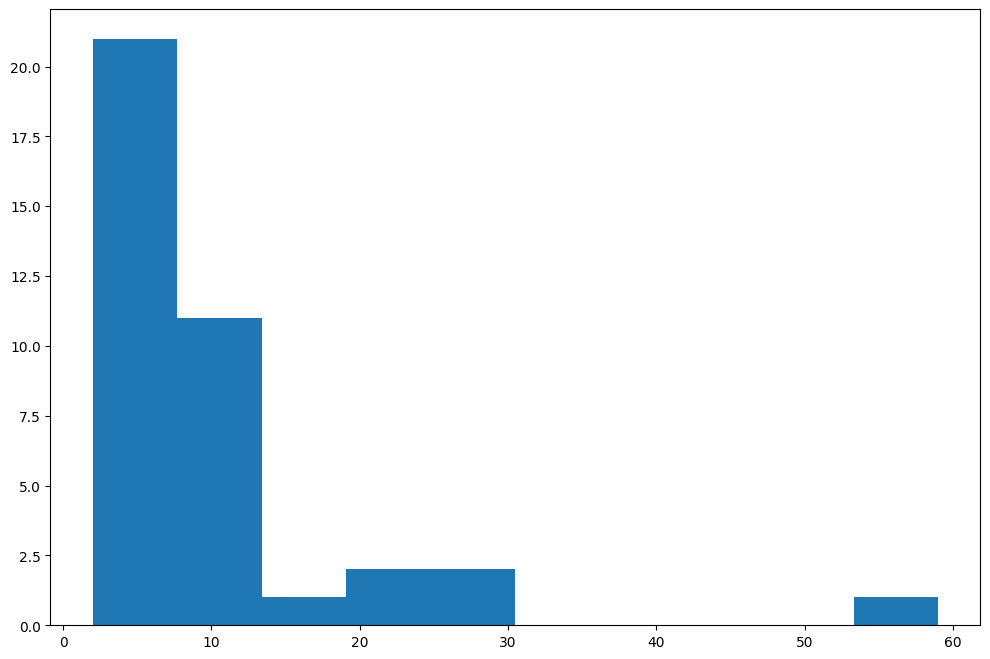

In [ ]:
# std adalah Ukuran sebaran dari data
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df[['Jumlah Rumah Sakit Umum']])
plt.show()

In [ ]:
mean = df['Jumlah Rumah Sakit Umum'].mean()
std = df['Jumlah Rumah Sakit Umum'].std()

In [ ]:
limit = 3*std

In [ ]:
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

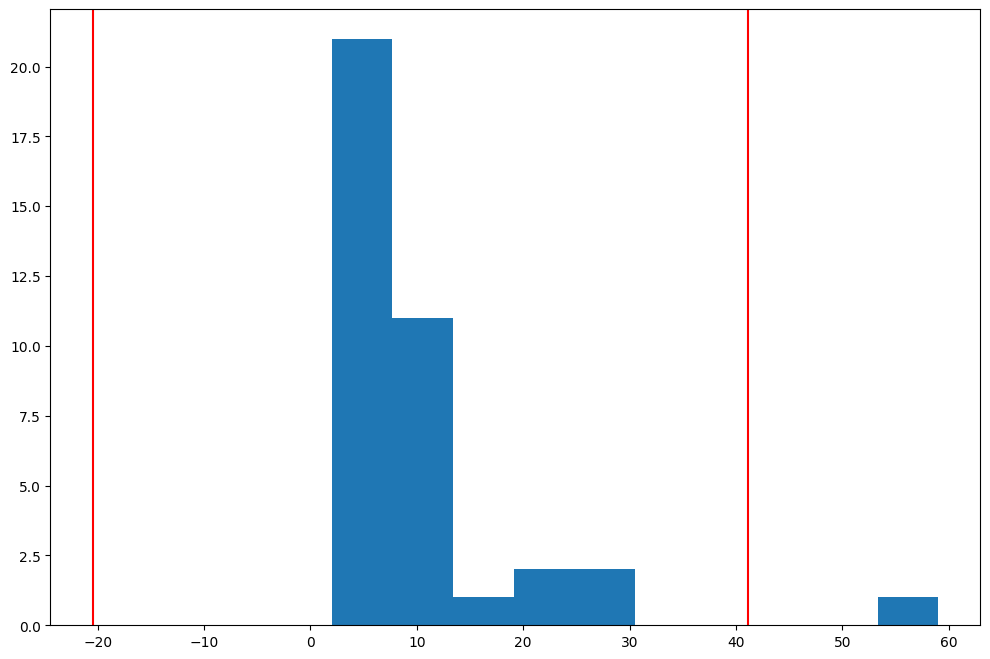

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['Jumlah Rumah Sakit Umum'])

ax.axvline(limit_atas, color='red')
ax.axvline(limit_bawah, color='red')
plt.show()

In [ ]:
(df['Jumlah Rumah Sakit Umum']<limit_bawah).sum()

0

In [ ]:
(df['Jumlah Rumah Sakit Umum']>limit_atas).sum()

1

In [ ]:
new_df =df[(df['Jumlah Rumah Sakit Umum'] > limit_bawah) & (df['Jumlah Rumah Sakit Umum'] < limit_atas)]

In [ ]:
new_df

,No,Kabupaten/Kota,Jumlah Rumah Sakit Umum,Jumlah Tempat Tidur,Pasien Keluar Hidup,Pasien Keluar Meninggal,Gross Death Rate,Net Death Rate,Jumlah Dokter
0,1,Kab. Pacitan,4,317,14423,755,37.9,11.9,70
1,2,Kab. Ponorogo,6,1008,57216,3955,42.9,21.7,226
2,3,Kab. Trenggalek,3,406,23729,1784,44.4,25.5,86
3,4,Kab. Tulungagung,12,1201,59786,5628,53.7,32.4,318
4,5,Kab. Blitar,9,658,32247,1552,31.2,14.7,212
5,6,Kab. Kediri,11,1132,43592,3680,44.7,33.2,311
6,7,Kab. Malang,22,2377,48745,6920,45.6,78.7,703
7,8,Kab. Lumajang,7,945,47732,3969,53.2,23.5,208
8,9,Kab. Jember,13,1684,65409,5719,42.5,37.9,552
9,10,Kab. Banyuwangi,14,1380,74452,5795,47.5,24.7,378


## Data Preparation

In [ ]:
from sklearn.cluster import KMeans
#from sklearn.dataset.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x =new_df[['Jumlah Rumah Sakit Umum',	'Jumlah Dokter', 'Jumlah Tempat Tidur', 'Pasien Keluar Hidup', 'Gross Death Rate']]

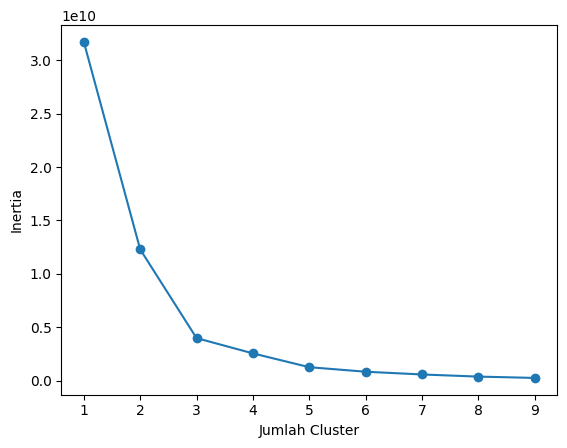

In [ ]:
cluster_range =range(1,10)

cluster_wss =[]

for num_cluster in cluster_range:
  clusters =KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.plot(cluster_range, cluster_wss, marker='o')

plt.show()

In [ ]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5795779006929501
For n_clusters=3, the silhouette score is 0.644006555885991
For n_clusters=4, the silhouette score is 0.589489088286154
For n_clusters=5, the silhouette score is 0.5947711957525104
For n_clusters=6, the silhouette score is 0.5511700742207286
For n_clusters=7, the silhouette score is 0.5712959460903985
For n_clusters=8, the silhouette score is 0.5849934415440561
For n_clusters=9, the silhouette score is 0.5574972400036762


In [ ]:
# Menentukan konfigurasi K-Means pada model
cls = KMeans(n_clusters =3, random_state=0)

# Membentuk model
model_cls = cls.fit(x)

In [ ]:
new_df['cluster']=model_cls.labels_
new_df

,No,Kabupaten/Kota,Jumlah Rumah Sakit Umum,Jumlah Tempat Tidur,Pasien Keluar Hidup,Pasien Keluar Meninggal,Gross Death Rate,Net Death Rate,Jumlah Dokter,cluster
0,1,Kab. Pacitan,4,317,14423,755,37.9,11.9,70,0
1,2,Kab. Ponorogo,6,1008,57216,3955,42.9,21.7,226,1
2,3,Kab. Trenggalek,3,406,23729,1784,44.4,25.5,86,0
3,4,Kab. Tulungagung,12,1201,59786,5628,53.7,32.4,318,1
4,5,Kab. Blitar,9,658,32247,1552,31.2,14.7,212,0
5,6,Kab. Kediri,11,1132,43592,3680,44.7,33.2,311,1
6,7,Kab. Malang,22,2377,48745,6920,45.6,78.7,703,1
7,8,Kab. Lumajang,7,945,47732,3969,53.2,23.5,208,1
8,9,Kab. Jember,13,1684,65409,5719,42.5,37.9,552,1
9,10,Kab. Banyuwangi,14,1380,74452,5795,47.5,24.7,378,1


## Elbow method

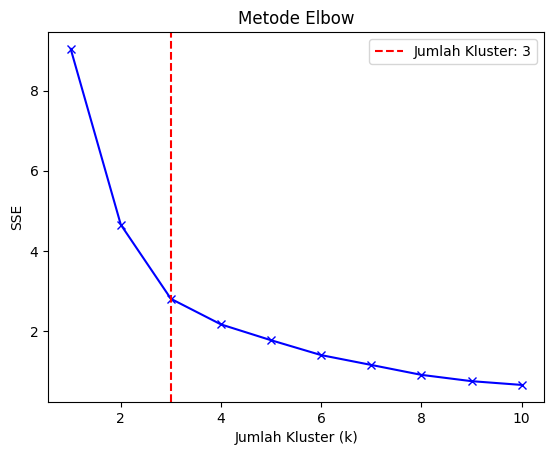

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)

sse = []

k_range = range(1, 11)

# KMeans dan menghitung SSE untuk setiap nilai
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)


plt.plot(k_range, sse, 'bx-')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('SSE')
plt.title('Metode Elbow')

num_clusters = 3
plt.axvline(x=num_clusters, color='red', linestyle='--', label='Jumlah Kluster: {}'.format(num_clusters))
plt.legend()

plt.show()


In [ ]:
ev_df = df.copy()

In [ ]:
ev_df =df[(df['Jumlah Rumah Sakit Umum'] > limit_bawah) & (df['Jumlah Rumah Sakit Umum'] < limit_atas)]

In [ ]:
x1 = ev_df[['Jumlah Rumah Sakit Umum', 'Jumlah Dokter', 'Jumlah Tempat Tidur', 'Pasien Keluar Hidup', 'Gross Death Rate']]

In [ ]:
# Membentuk model dengan jumlah kluster yang ditentukan
model_EB = KMeans(n_clusters=3, random_state=0)
model_EB.fit(x1)

KMeans(n_clusters=3, random_state=0)

In [ ]:
ev_df['cluster']=model_EB.labels_
ev_df

,No,Kabupaten/Kota,Jumlah Rumah Sakit Umum,Jumlah Tempat Tidur,Pasien Keluar Hidup,Pasien Keluar Meninggal,Gross Death Rate,Net Death Rate,Jumlah Dokter,cluster
0,1,Kab. Pacitan,4,317,14423,755,37.9,11.9,70,0
1,2,Kab. Ponorogo,6,1008,57216,3955,42.9,21.7,226,1
2,3,Kab. Trenggalek,3,406,23729,1784,44.4,25.5,86,0
3,4,Kab. Tulungagung,12,1201,59786,5628,53.7,32.4,318,1
4,5,Kab. Blitar,9,658,32247,1552,31.2,14.7,212,0
5,6,Kab. Kediri,11,1132,43592,3680,44.7,33.2,311,1
6,7,Kab. Malang,22,2377,48745,6920,45.6,78.7,703,1
7,8,Kab. Lumajang,7,945,47732,3969,53.2,23.5,208,1
8,9,Kab. Jember,13,1684,65409,5719,42.5,37.9,552,1
9,10,Kab. Banyuwangi,14,1380,74452,5795,47.5,24.7,378,1


Mencari variable yang berpengaruh terhadap cluster

Faktor Variabel pada Kluster 0:
Pasien Keluar Hidup: 0.9997828937138382
Jumlah Tempat Tidur: 0.01955496785423777
Jumlah Dokter: 0.007192741782947931
Jumlah Rumah Sakit Umum: 0.00017290221217669245
Gross Death Rate: 5.691988246552682e-05

Faktor Variabel pada Kluster 1:
Pasien Keluar Hidup: 0.020836156050047405
Gross Death Rate: -0.006338219977192395
Jumlah Rumah Sakit Umum: -0.00807733470537033
Jumlah Dokter: -0.33971208943845776
Jumlah Tempat Tidur: -0.9402425934417108

Faktor Variabel pada Kluster 2:
Jumlah Dokter: 0.9404696199438713
Jumlah Rumah Sakit Umum: 0.0037707887680023403
Pasien Keluar Hidup: -0.0001204234222950129
Gross Death Rate: -0.007193507240455291
Jumlah Tempat Tidur: -0.33978068524634886



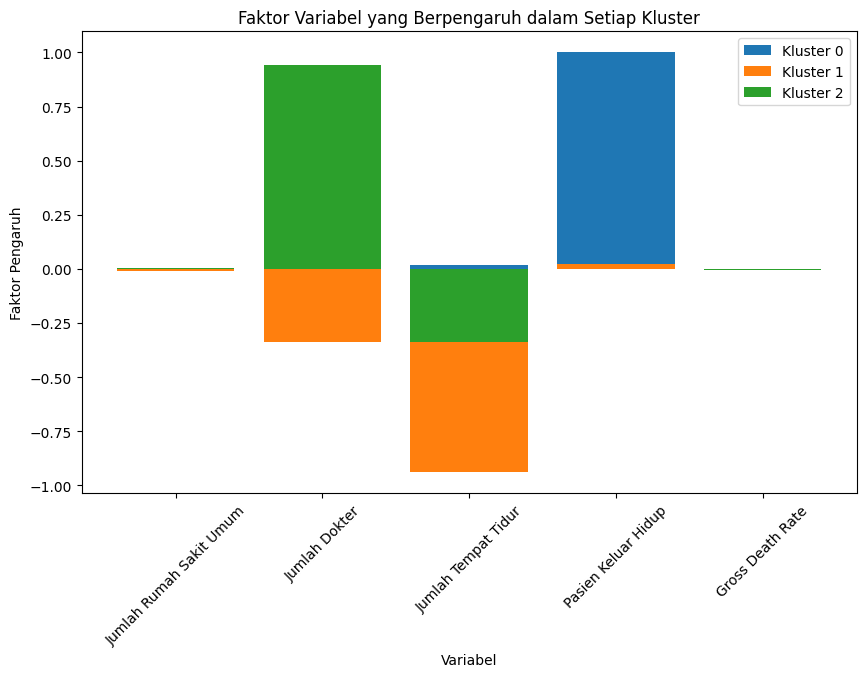

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# PCA untuk menentukan faktor variabel yang berpengaruh
pca = PCA()
pca.fit(x1)

components = pca.components_
explained_variance = pca.explained_variance_ratio_

for cluster in range(num_clusters):
    print(f"Faktor Variabel pada Kluster {cluster}:")
    cluster_components = components[cluster]
    sorted_indices = cluster_components.argsort()[::-1]
    for i in sorted_indices:
        print(f"{selected_columns[i]}: {cluster_components[i]}")
    print()

plt.figure(figsize=(10, 6))
plt.bar(selected_columns, components[0], label='Kluster 0')
plt.bar(selected_columns, components[1], label='Kluster 1')
plt.bar(selected_columns, components[2], label='Kluster 2')
plt.xlabel('Variabel')
plt.ylabel('Faktor Pengaruh')
plt.title('Faktor Variabel yang Berpengaruh dalam Setiap Kluster')
plt.legend()
plt.xticks(rotation=45)
plt.show()

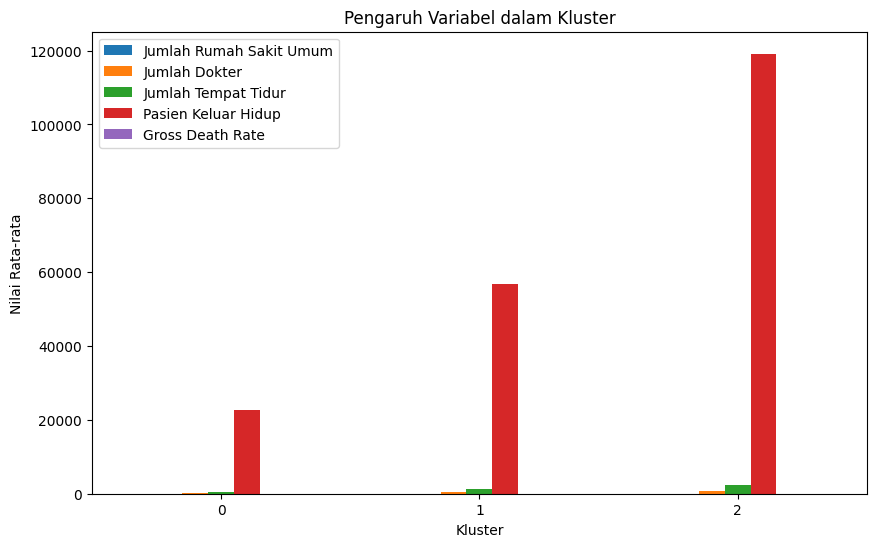

In [ ]:
cluster_means = ev_df.groupby('cluster')[selected_columns].mean()

fig, ax = plt.subplots(figsize=(10, 6))
cluster_means.plot(kind='bar', ax=ax)
ax.set_xlabel('Kluster')
ax.set_ylabel('Nilai Rata-rata')
ax.set_title('Pengaruh Variabel dalam Kluster')
plt.xticks(rotation=0)
plt.show()

hasil visualisasi menggunakan acuan outlayer dari variable yang berpengaruh terhadap cluster

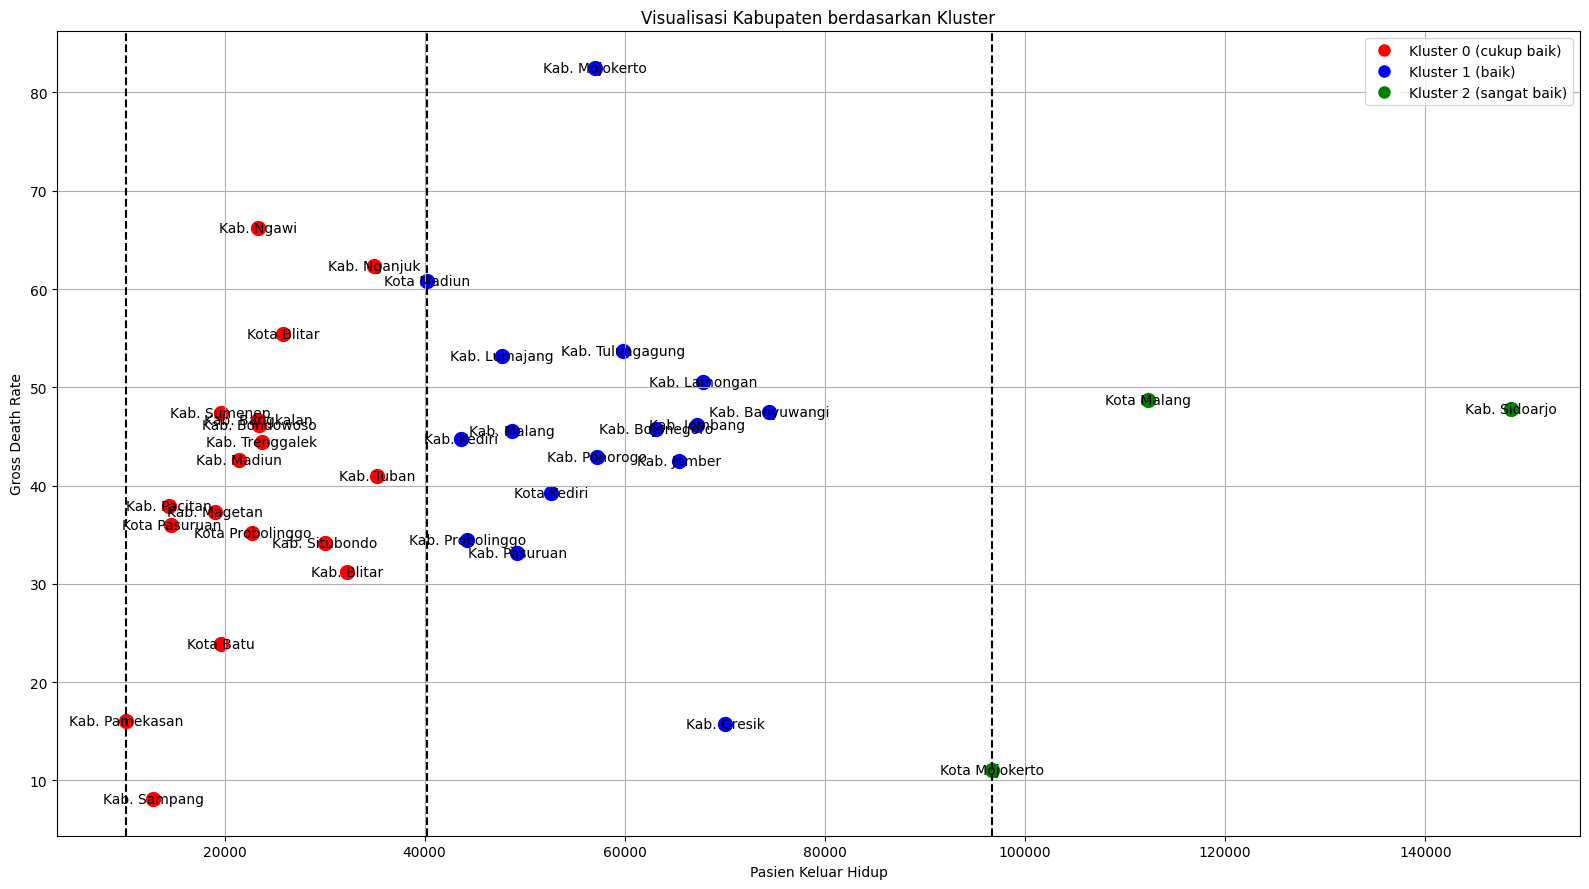

In [ ]:
cluster_colors = ['red', 'blue', 'green']

plt.figure(figsize=(16, 9))
for cluster in range(num_clusters):
    cluster_indices = ev_df.loc[ev_df['cluster'] == cluster].index
    legend_label = f'Kluster {cluster}'

    if len(cluster_indices) > 0:
        plt.scatter(ev_df.loc[cluster_indices, 'Pasien Keluar Hidup'], ev_df.loc[cluster_indices, 'Gross Death Rate'], color=cluster_colors[cluster], label=legend_label, s=100)

        for index in cluster_indices:
            plt.text(ev_df.loc[index, 'Pasien Keluar Hidup'], ev_df.loc[index, 'Gross Death Rate'], ev_df.loc[index, 'Kabupaten/Kota'], fontsize=10, ha='center', va='center')

        # Pasien keluar hidup terendah dalam kluster
        min_pasien_keluar_hidup = ev_df.loc[cluster_indices, 'Pasien Keluar Hidup'].min()

        # Garis pembatas
        plt.axvline(x=min_pasien_keluar_hidup, color='black', linestyle='--')

plt.xlabel('Pasien Keluar Hidup')
plt.ylabel('Gross Death Rate')
plt.title('Visualisasi Kabupaten berdasarkan Kluster')
plt.legend()

plt.grid(True)

legend_labels = ['Kluster 0 (cukup baik)', 'Kluster 1 (baik)', 'Kluster 2 (sangat baik)']
legend_handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_colors]
plt.legend(legend_handles, legend_labels)

plt.tight_layout()
plt.show()

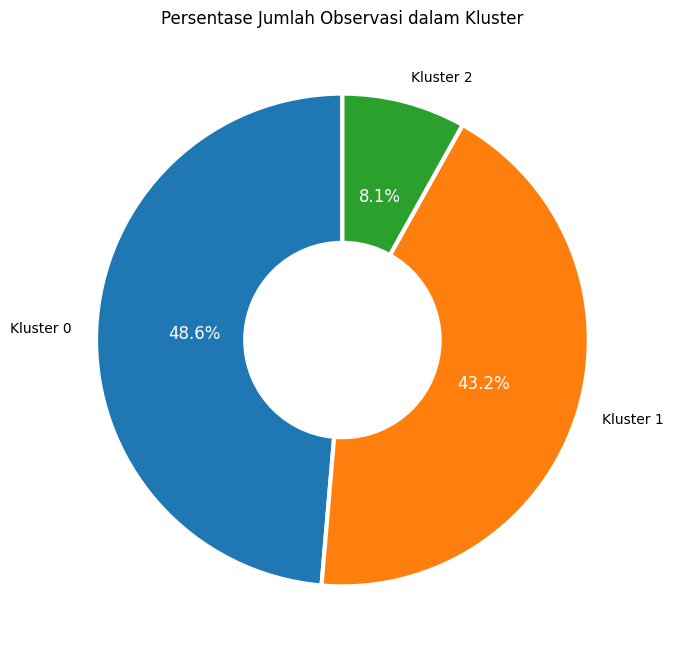

In [ ]:
cluster_counts = ev_df['cluster'].value_counts().sort_index()
percentages = cluster_counts / cluster_counts.sum() * 100

# donat chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, text, autotext = ax.pie(cluster_counts.values, labels=['Kluster 0', 'Kluster 1', 'Kluster 2'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 3})

for autotext in autotext:
    autotext.set_color('white')
    autotext.set_fontsize(12)

circle = plt.Circle((0, 0), 0.4, color='white')
fig.gca().add_artist(circle)

ax.set(aspect="equal")

plt.title('Persentase Jumlah Observasi dalam Kluster')
plt.show()


In [ ]:
from google.colab import files

#xlsx=new_df.to_csv('new_df.csv')
#files.download('new_df.csv')